In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('datasets/covid19_Confirmed_dataset.csv')
data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
data.head(6)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24


In [9]:
data.shape

(266, 104)

In [10]:
data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=104)

In [12]:
data.isna().sum()

Province/State    184
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/26/20             0
4/27/20             0
4/28/20             0
4/29/20             0
4/30/20             0
Length: 104, dtype: int64

In [13]:
data['Province/State']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
261    NaN
262    NaN
263    NaN
264    NaN
265    NaN
Name: Province/State, Length: 266, dtype: object

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 104 entries, Province/State to 4/30/20
dtypes: float64(2), int64(100), object(2)
memory usage: 216.3+ KB


In [15]:
data.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.259359,22.432499,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,9582.033835,9865.063910,10179.481203,10506.875940,10826.203008,11102.887218,11360.176692,1.163550e+04,1.191693e+04,1.224378e+04
std,24.747943,70.478908,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,55192.088929,56941.164602,58758.271305,60812.226451,62832.838104,64533.887576,65963.984777,6.750782e+04,6.918917e+04,7.102980e+04
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.907750,-18.093125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,62.250000,67.000000,72.250000,72.250000,74.000000,74.250000,7.500000e+01,7.600000e+01,7.725000e+01
50%,23.488100,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,339.000000,342.500000,372.500000,403.000000,403.000000,423.000000,423.500000,4.335000e+02,4.555000e+02,4.665000e+02
75%,41.143200,77.191525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1712.500000,1767.750000,1781.250000,1800.500000,1894.250000,1928.250000,1974.500000,2.020000e+03,2.047250e+03,2.105250e+03
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,811865.000000,840351.000000,869170.000000,905358.000000,938154.000000,965785.000000,988197.000000,1.012582e+06,1.039909e+06,1.069424e+06


In [16]:
data[data['1/22/20'] == 444]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
62,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,68128,68128,68128,68128,68128,68128,68128,68128,68128,68128


# Data Cleaning

In [17]:
data.isna().sum()

Province/State    184
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/26/20             0
4/27/20             0
4/28/20             0
4/29/20             0
4/30/20             0
Length: 104, dtype: int64

In [18]:
data.isnull().sum()

Province/State    184
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/26/20             0
4/27/20             0
4/28/20             0
4/29/20             0
4/30/20             0
Length: 104, dtype: int64

In [20]:
data.shape

(266, 104)

In [21]:
data.drop(columns=['Lat', 'Long', 'Province/State'], axis=1, inplace=True)

In [22]:
data.shape

(266, 101)

In [23]:
data.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [24]:
data.isnull().sum()

Country/Region    0
1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
                 ..
4/26/20           0
4/27/20           0
4/28/20           0
4/29/20           0
4/30/20           0
Length: 101, dtype: int64

In [25]:
data['Country/Region']

0                Afghanistan
1                    Albania
2                    Algeria
3                    Andorra
4                     Angola
               ...          
261           Western Sahara
262    Sao Tome and Principe
263                    Yemen
264                  Comoros
265               Tajikistan
Name: Country/Region, Length: 266, dtype: object

In [26]:
data[data['Country/Region'] == 'Afghanistan']

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171


In [27]:
data[data['Country/Region'] == 'Afghanistan'].transpose()

,0
Country/Region,Afghanistan
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
...,...
4/26/20,1531
4/27/20,1703
4/28/20,1828
4/29/20,1939


In [75]:
d = data[data['Country/Region'] == 'Afghanistan'].T[25:75]
d.tail()

,0
3/31/20,174
4/1/20,237
4/2/20,273
4/3/20,281
4/4/20,299


In [29]:
data[data['Country/Region'] == 'India']

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
131,India,0,0,0,0,0,0,0,0,1,...,20080,21370,23077,24530,26283,27890,29451,31324,33062,34863


In [76]:
d1 = data[data['Country/Region'] == 'India'].T[8:25]
d1.head()

,131
1/29/20,0
1/30/20,1
1/31/20,1
2/1/20,1
2/2/20,2


In [77]:
d2 = data[data['Country/Region'] == 'India'].T[60:90]
d2.head()

,131
3/21/20,330
3/22/20,396
3/23/20,499
3/24/20,536
3/25/20,657


In [78]:
d3 = data[data['Country/Region'] == 'China']
d3.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
49,China,1,9,15,39,60,70,106,152,200,...,991,991,991,991,991,991,991,991,991,991
50,China,14,22,36,41,68,80,91,111,114,...,593,593,593,593,593,593,593,593,593,593
51,China,6,9,27,57,75,110,132,147,182,...,579,579,579,579,579,579,579,579,579,579
52,China,1,5,10,18,35,59,80,84,101,...,355,355,355,355,355,355,355,355,355,356
53,China,0,2,2,4,7,14,19,24,26,...,139,139,139,139,139,139,139,139,139,139


# Groupby() Function

In [33]:
data

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Western Sahara,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,Yemen,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,Comoros,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
data.groupby('Country/Region')

In [92]:
for i,(x, y) in enumerate(data.groupby('Country/Region')):
    print(x)
    print(y)
    print()
    print('--------------------------------------------------------------------------------------------')
    print()

    if i == 2:
        break

Afghanistan
  Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0    Afghanistan        0        0        0        0        0        0   

   1/28/20  1/29/20  1/30/20  ...  4/21/20  4/22/20  4/23/20  4/24/20  \
0        0        0        0  ...     1092     1176     1279     1351   

   4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  
0     1463     1531     1703     1828     1939     2171  

[1 rows x 101 columns]

--------------------------------------------------------------------------------------------

Albania
  Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
1        Albania        0        0        0        0        0        0   

   1/28/20  1/29/20  1/30/20  ...  4/21/20  4/22/20  4/23/20  4/24/20  \
1        0        0        0  ...      609      634      663      678   

   4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  
1      712      726      736      750      766      773  

[1 rows x 101 columns]

------------

In [36]:
grp_data = data.groupby('Country/Region').sum()
grp_data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,466,474,480,484,342,342,342,343,344,344
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6


In [37]:
grp_data.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=187)

In [93]:
for index, country in enumerate(grp_data.index):
    print(index, country)

    if index == 10:
        break

0 Afghanistan
1 Albania
2 Algeria
3 Andorra
4 Angola
5 Antigua and Barbuda
6 Argentina
7 Armenia
8 Australia
9 Austria
10 Azerbaijan


In [40]:
grp_data.iloc[36]

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
4/26/20    83912
4/27/20    83918
4/28/20    83940
4/29/20    83944
4/30/20    83956
Name: China, Length: 100, dtype: int64

In [83]:
d4 = data[(data['Country/Region'] == 'China')]
d4.head(7)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
49,China,1,9,15,39,60,70,106,152,200,...,991,991,991,991,991,991,991,991,991,991
50,China,14,22,36,41,68,80,91,111,114,...,593,593,593,593,593,593,593,593,593,593
51,China,6,9,27,57,75,110,132,147,182,...,579,579,579,579,579,579,579,579,579,579
52,China,1,5,10,18,35,59,80,84,101,...,355,355,355,355,355,355,355,355,355,356
53,China,0,2,2,4,7,14,19,24,26,...,139,139,139,139,139,139,139,139,139,139
54,China,26,32,53,78,111,151,207,277,354,...,1582,1582,1585,1585,1586,1587,1587,1588,1588,1588
55,China,2,5,23,23,36,46,51,58,78,...,254,254,254,254,254,254,254,254,254,254


In [84]:
d5 = data[(data['Country/Region'] == 'China')][['Country/Region', '1/22/20']]
d5.head(6)

,Country/Region,1/22/20
49,China,1
50,China,14
51,China,6
52,China,1
53,China,0
54,China,26


In [85]:
d6 = data['1/22/20'][49:82]
d6.head(8)

49     1
50    14
51     6
52     1
53     0
54    26
55     2
56     1
Name: 1/22/20, dtype: int64

In [90]:
lst = list(data['1/22/20'][49:82])
lst[:9]

[1, 14, 6, 1, 0, 26, 2, 1, 4]

In [89]:
len(lst)

33

In [46]:
sum(lst)

548

In [91]:
lst = list(data['1/23/20'][49:82])
lst[:9]

[9, 22, 9, 5, 2, 32, 5, 3, 5]

In [48]:
len(lst)

33

In [49]:
sum(lst)

643

# Start Comparing between China and India covid cases over day

In [50]:
grp_data.iloc[36]

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
4/26/20    83912
4/27/20    83918
4/28/20    83940
4/29/20    83944
4/30/20    83956
Name: China, Length: 100, dtype: int64

In [51]:
grp_data.iloc[79]

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
4/26/20    27890
4/27/20    29451
4/28/20    31324
4/29/20    33062
4/30/20    34863
Name: India, Length: 100, dtype: int64

In [52]:
grp_data.loc['India']

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
4/26/20    27890
4/27/20    29451
4/28/20    31324
4/29/20    33062
4/30/20    34863
Name: India, Length: 100, dtype: int64

In [53]:
data

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Western Sahara,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,Yemen,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,Comoros,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
data.iloc[4,0]

'Angola'

In [55]:
data.iloc[4:5,0:1]

,Country/Region
4,Angola


In [56]:
data.loc[4, 'Country/Region']

'Angola'

In [57]:
data.loc[4:4,'Country/Region']

4    Angola
Name: Country/Region, dtype: object

# Data Visualization

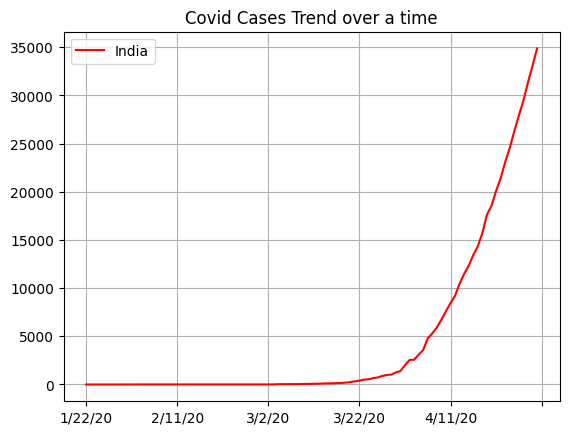

In [58]:
# For India

grp_data.loc['India'].plot(color='r')
plt.title('Covid Cases Trend over a time')
plt.legend()
plt.grid()
plt.show()

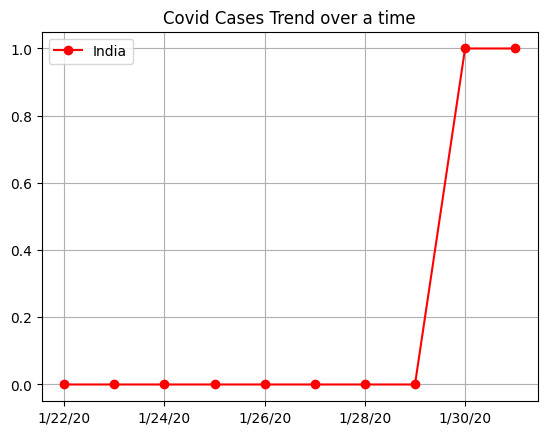

In [59]:
# For India

grp_data.loc['India'][:10].plot(color='r', marker='o')
plt.title('Covid Cases Trend over a time')
plt.legend()
plt.grid()
plt.show()

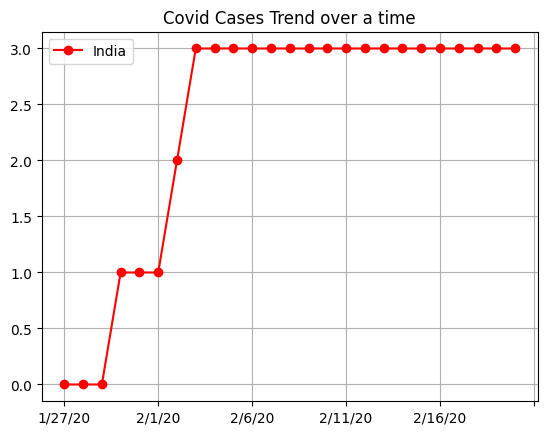

In [60]:
# For India

grp_data.loc['India'][5:30].plot(color='r', marker='o')
plt.title('Covid Cases Trend over a time')
plt.legend()
plt.grid()
plt.show()

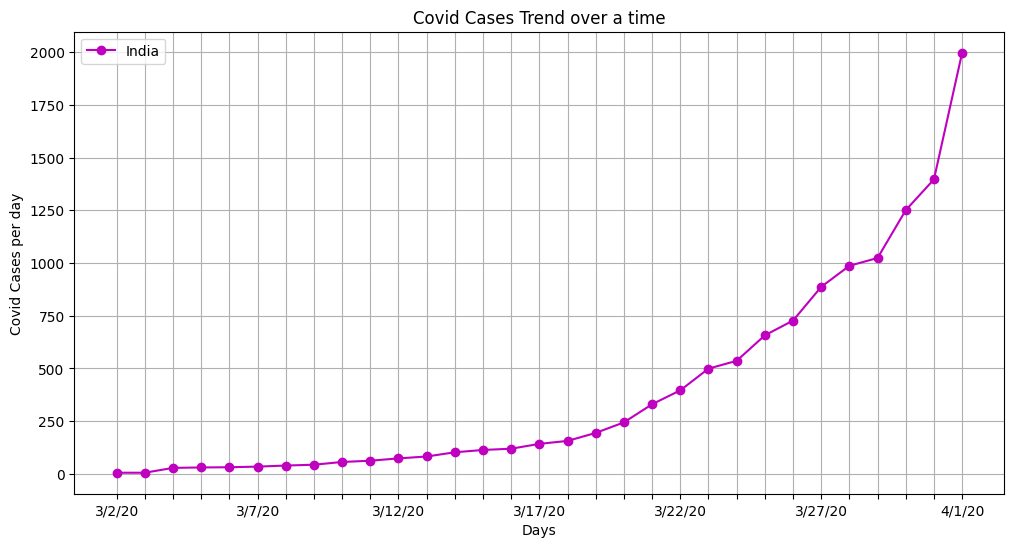

In [61]:
# For India

plt.figure(figsize=(12,6))
grp_data.loc['India'][40:71].plot(color='m', marker='o')
plt.title('Covid Cases Trend over a time')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Covid Cases per day')
plt.xticks(np.arange(0,31))
plt.grid()
plt.show()

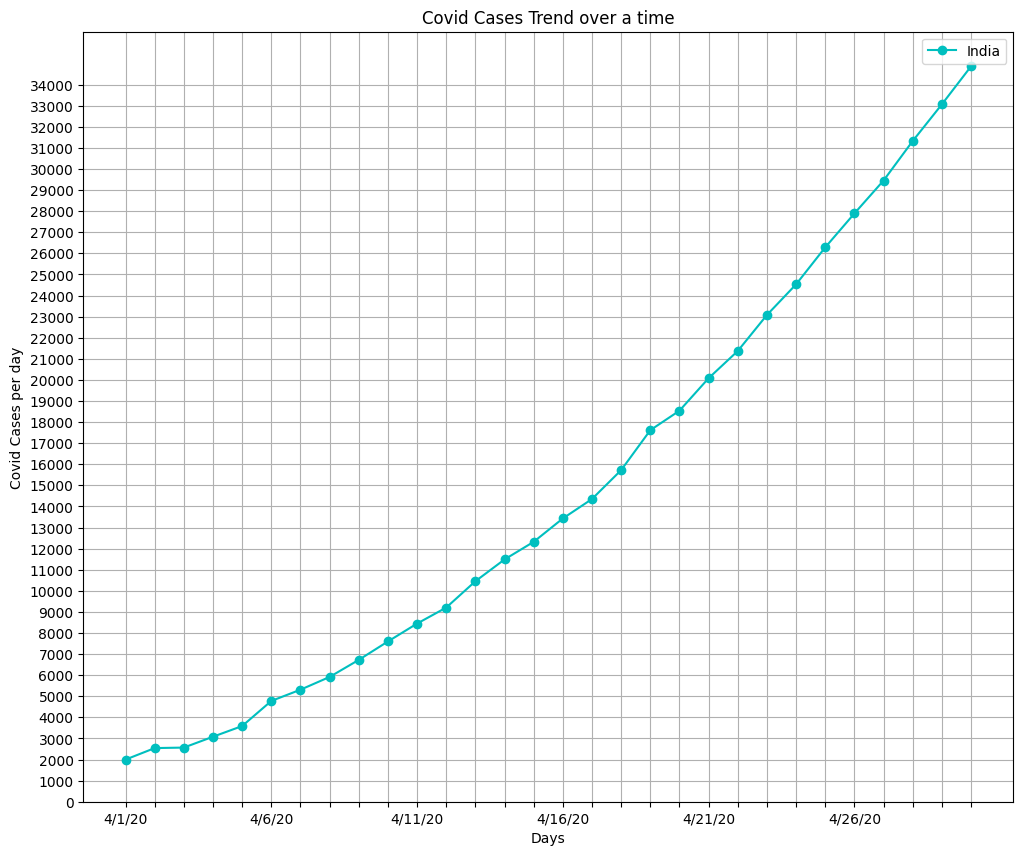

In [62]:
# For India

plt.figure(figsize=(12,10))
grp_data.loc['India'][70:].plot(color='c', marker='o')
plt.title('Covid Cases Trend over a time')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Covid Cases per day')
plt.xticks(np.arange(0,30))
plt.yticks(np.arange(0,35000,1000))
plt.grid()
plt.show()

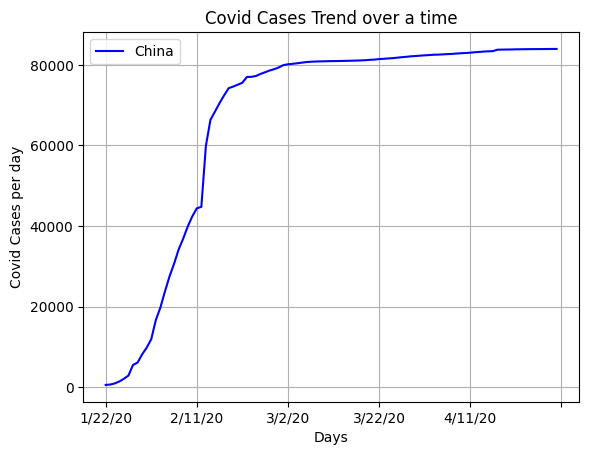

In [63]:
# For China

grp_data.loc['China'].plot(color='b')
plt.title('Covid Cases Trend over a time')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Covid Cases per day')
plt.grid()
plt.show()

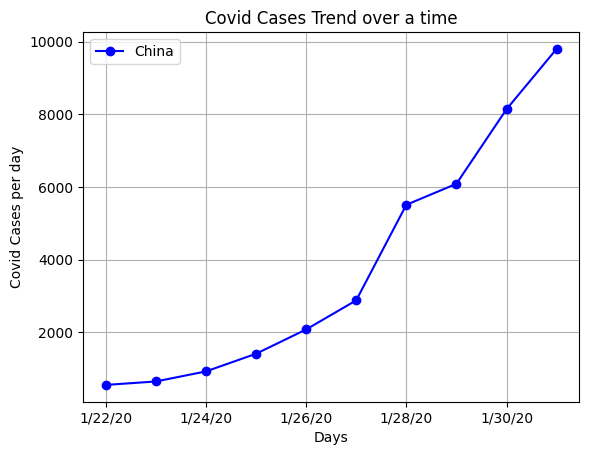

In [64]:
# For China

grp_data.loc['China'][:10].plot(color='b', marker='o')
plt.title('Covid Cases Trend over a time')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Covid Cases per day')
plt.grid()
plt.show()

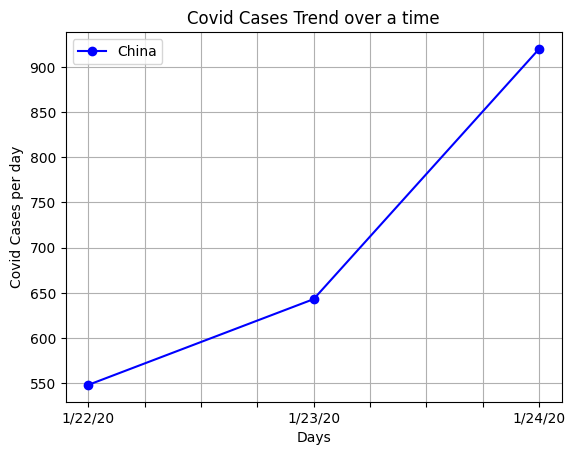

In [65]:
# For China

grp_data.loc['China'][:3].plot(color='b', marker='o')
plt.title('Covid Cases Trend over a time')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Covid Cases per day')
plt.grid()
plt.show()

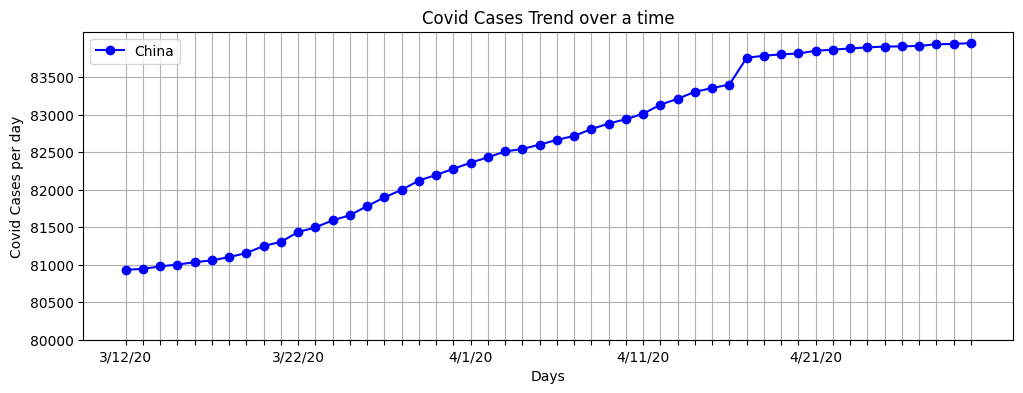

In [66]:
# For China

plt.figure(figsize=(12,4))
grp_data.loc['China'][50:].plot(color='b', marker='o')
plt.title('Covid Cases Trend over a time')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Covid Cases per day')
plt.xticks(np.arange(0,50))
plt.yticks(np.arange(80000,84000,500))
plt.grid()
plt.show()

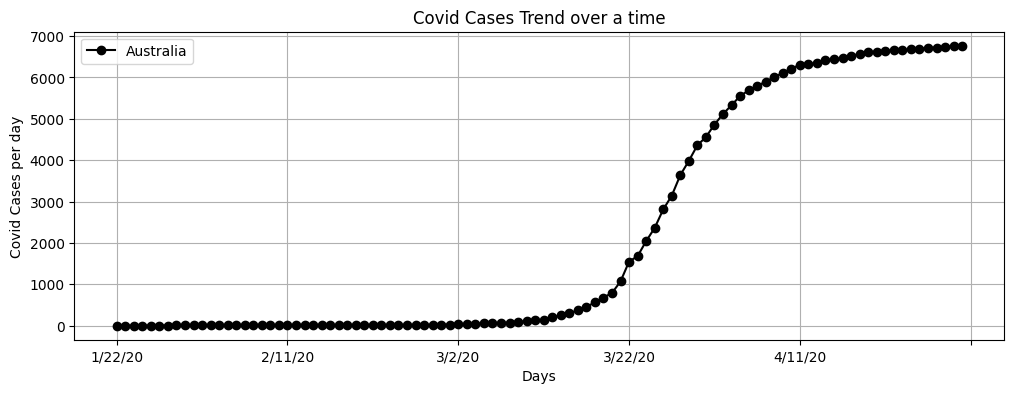

In [67]:
# For Australia

plt.figure(figsize=(12,4))
grp_data.loc['Australia'].plot(color='black', marker='o')
plt.title('Covid Cases Trend over a time')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Covid Cases per day')
plt.grid()
plt.show()

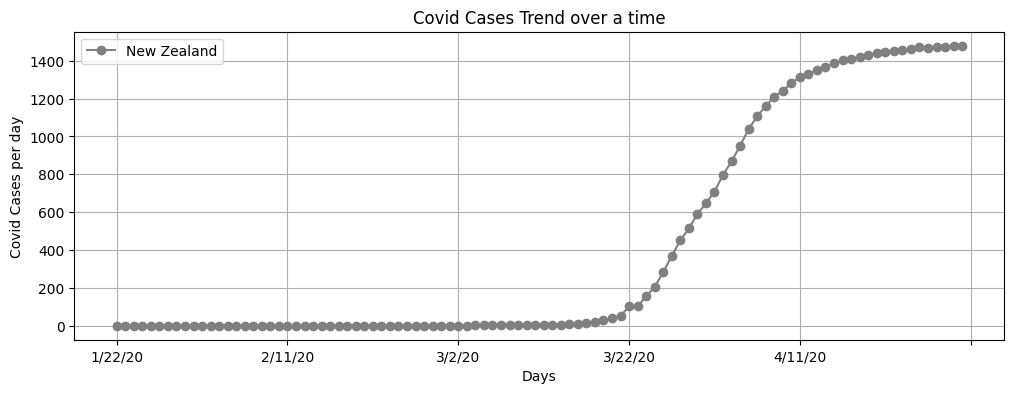

In [68]:
# For New Zealand

plt.figure(figsize=(12,4))
grp_data.loc['New Zealand'].plot(color='grey', marker='o')
plt.title('Covid Cases Trend over a time')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Covid Cases per day')
plt.grid()
plt.show()

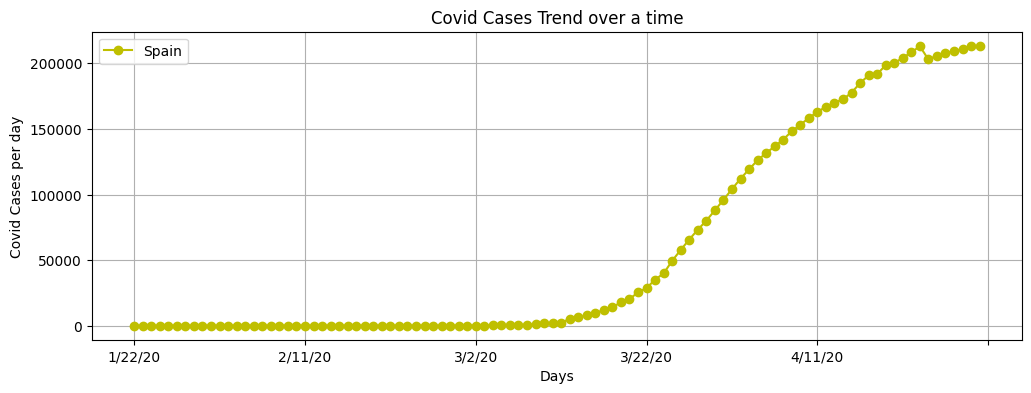

In [69]:
# For Spain

plt.figure(figsize=(12,4))
grp_data.loc['Spain'].plot(color='y', marker='o')
plt.title('Covid Cases Trend over a time')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Covid Cases per day')
plt.grid()
plt.show()

# Multiple Countries

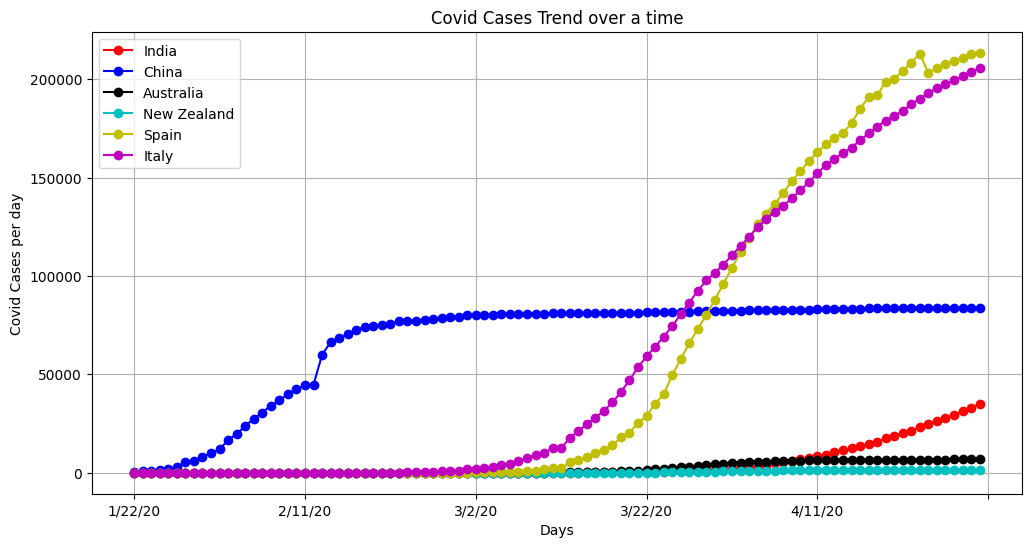

In [70]:
plt.figure(figsize=(12,6))

grp_data.loc['India'].plot(color='red', marker='o')
grp_data.loc['China'].plot(color='blue', marker='o')
grp_data.loc['Australia'].plot(color='black', marker='o')
grp_data.loc['New Zealand'].plot(color='c', marker='o')
grp_data.loc['Spain'].plot(color='y', marker='o')
grp_data.loc['Italy'].plot(color='m', marker='o')

plt.title('Covid Cases Trend over a time')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Covid Cases per day')
plt.grid()
plt.show()

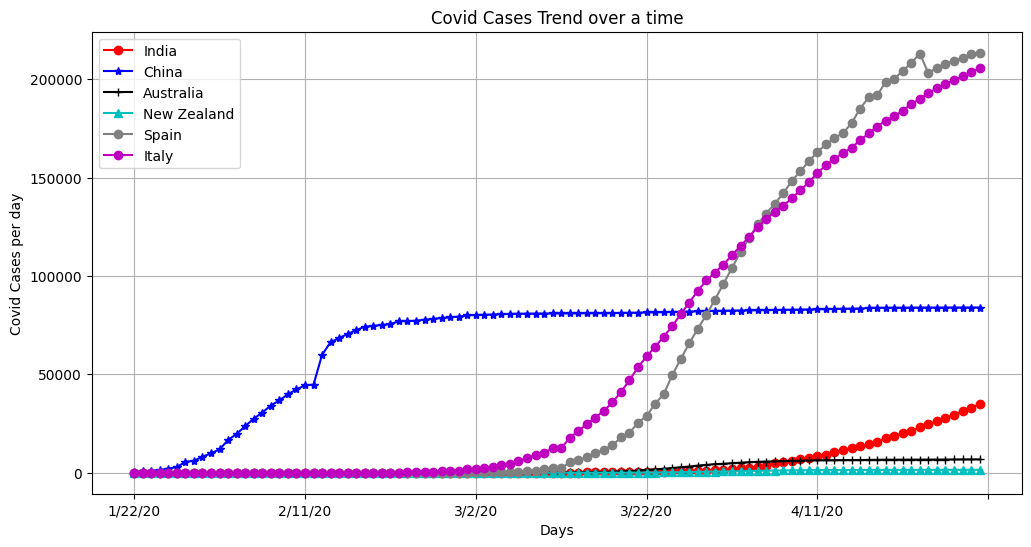

In [71]:
plt.figure(figsize=(12,6))

grp_data.loc['India'].plot(color='red', marker='o')
grp_data.loc['China'].plot(color='blue', marker='*')
grp_data.loc['Australia'].plot(color='black', marker='+')
grp_data.loc['New Zealand'].plot(color='c', marker='^')
grp_data.loc['Spain'].plot(color='grey', marker='o')
grp_data.loc['Italy'].plot(color='m', marker='o')

plt.title('Covid Cases Trend over a time')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Covid Cases per day')
plt.grid()
plt.show()